In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Embedding, Conv1D, MaxPooling1D, Activation, Dropout
from tensorflow.keras.layers import Reshape, Softmax, Permute, Multiply, dot, concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report

## DATALOADER

In [4]:
X_train = np.load('/content/gdrive/MyDrive/data/Augmented1/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/data/Augmented1/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/data/Augmented1/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/data/Augmented1/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/data/Augmented1/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/data/Augmented1/y_val.npy')

In [5]:
X_train[0].shape

(98,)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(16893, 98) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


## CRNN - Review Later

In [7]:
inputs = Input(shape=(98,1))
conv1 = Conv1D(32, 5, activation='relu',kernel_regularizer=l2(0.01))(inputs)
pool1 = MaxPooling1D(2)(conv1)
conv2 = Conv1D(64, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(2)(conv2)
conv3 = Conv1D(32, 5, activation='relu')(pool2)
pool3 = MaxPooling1D(2)(conv3)

gru1 = GRU(128, return_sequences=True)(pool3)
lstm1 = LSTM(64)(gru1)

q = Dense(128)(lstm1)
k = Dense(128)(lstm1)
v = Dense(128)(lstm1)

q = Reshape((1, 128))(q)
k = Reshape((1, 128))(k)
v = Reshape((1, 128))(v)

attention = dot([q, k], axes=[2, 2])
attention = Activation('softmax')(attention)

output = dot([attention, v], axes=[2, 1])
output = Reshape((128,))(output)

dense1 = Dense(32, activation='softmax')(output)
dense1 = Dropout(0.5)(dense1)

output = Dense(2, activation='softmax')(dense1)

model = Model(inputs=inputs, outputs=output)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 98, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 94, 32)       192         ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 47, 32)       0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 43, 64)       10304       ['max_pooling1d[0][0]']          
                                                                                              

In [8]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(amsgrad=True),
    metrics=['accuracy']
)

In [9]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 120, shuffle = False)

Epoch 1/120
528/528 [==============================] - 24s 12ms/step - loss: 0.5812 - accuracy: 0.7098 - val_loss: 0.4181 - val_accuracy: 0.8721
Epoch 2/120
528/528 [==============================] - 5s 9ms/step - loss: 0.3873 - accuracy: 0.8720 - val_loss: 0.3097 - val_accuracy: 0.9100
Epoch 3/120
528/528 [==============================] - 6s 10ms/step - loss: 0.3181 - accuracy: 0.9115 - val_loss: 0.2823 - val_accuracy: 0.9133
Epoch 4/120
528/528 [==============================] - 5s 9ms/step - loss: 0.2747 - accuracy: 0.9217 - val_loss: 0.2328 - val_accuracy: 0.9306
Epoch 5/120
528/528 [==============================] - 5s 10ms/step - loss: 0.2502 - accuracy: 0.9268 - val_loss: 0.1999 - val_accuracy: 0.9349
Epoch 6/120
528/528 [==============================] - 5s 10ms/step - loss: 0.2357 - accuracy: 0.9300 - val_loss: 0.2024 - val_accuracy: 0.9339
Epoch 7/120
528/528 [==============================] - 4s 8ms/step - loss: 0.2143 - accuracy: 0.9366 - val_loss: 0.1901 - val_accuracy: 0

In [10]:
# model.save("/content/gdrive/MyDrive/Models/WithExtraDenseWithRegularizerwithAttention.h5")
print("Model Score: \n")
score = model.evaluate(X_test, y_test)
print(score)

Model Score: 

66/66 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.9810
[0.10450973361730576, 0.9810336828231812]


##METRICS

In [11]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9470 sha256=3d2441a074ed9441e42daf996b6abca5291a9d54833150238704fe13e6622a2f
  Stored in directory: /root/.cache/pip/wheels/aa/0a/0f/0775c812151040fb695c0890d902810a9d69e1db50181e5328
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320515 sha256=09928a65a4cc6b1da133f246d015479e339e713fdfa5517b92efba2db814009a
  Stored in directory: /root/.cache/pip/wheels/d2/50/d6/95e7c7713c3c1609e30a394d7431ffc11e4f7deb82d13ffceb
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

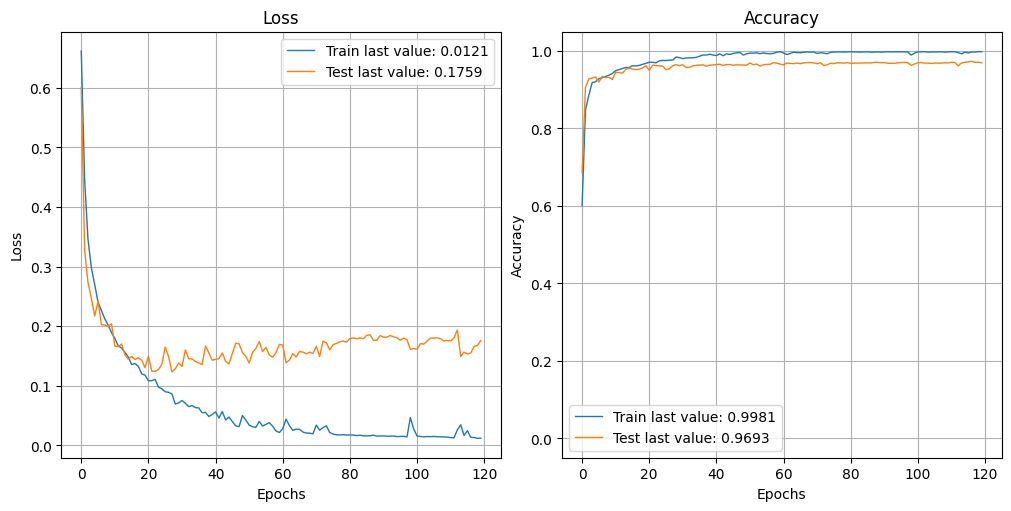

In [ ]:
from plot_keras_history import show_history, plot_history
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1049
           1       0.97      0.98      0.98      1060

    accuracy                           0.98      2109
   macro avg       0.98      0.98      0.98      2109
weighted avg       0.98      0.98      0.98      2109

Confusion matrix, without normalization
[[1022   27]
 [  20 1040]]


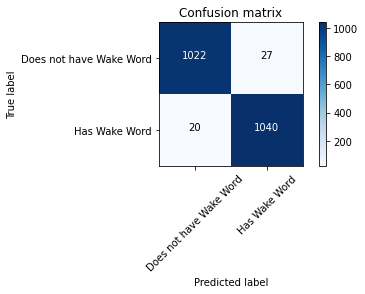

In [ ]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])

##PREDICTIONS & LATENCY


In [ ]:
pip install spafe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 KB 3.9 MB/s eta 0:00:00


In [ ]:
import spafe
from spafe.features.lfcc import lfcc
import pywt

In [ ]:
def predict(audio):
  audio_data, sr = librosa.load(audio)

  wavelet = 'db4'
  level = 4
  coeffs = pywt.wavedec(audio_data, wavelet, level=level)
  threshold = np.median(np.abs(coeffs[-level])) / 0.6745
  for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)
  denoised_audio = pywt.waverec(coeffs, wavelet)

  lfccs  = lfcc(denoised_audio, fs = sr, num_ceps=13)
  lfccs_processed = np.mean(lfccs.T, axis=0) # some pre-processing
  lfccs_new = np.expand_dims(np.asarray(lfccs_processed), axis=0)
  predictions = model.predict(lfccs_new)
  return predictions

In [ ]:
audio_for_pred = "/content/gdrive/MyDrive/Marvin/marvin (170).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 65ms/step
[[0. 1.]]


In [ ]:
audio_for_pred = "/content/gdrive/MyDrive/False/yes (824).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 26ms/step
[[1. 0.]]
